*Getting Started with Tensorflow 2*

*Week 2 Lab*

*Coursera/Imperial College London*

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Sequential Model API

## **Building a Sequential Model**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

**Build a feedforward neural network model**

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(16, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


You can substitute the Softmax activation function in the last `Dense` layer by a new `Softmax` layer. Note that the default activation function for the dense layer is linear. If you now run `model.summary()`, you can check that the output is identical as the previous one.

In addition, you can try to define a name for each layer. For instance, let's call the first layer `layer_1` 


In [5]:
# Build the Sequential feedforward neural network model

model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(16, activation='relu', name='layer_1'),
                    Dense(16, activation='relu'),
                    Dense(10),
                    Softmax()
])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## **Convolutional and pooling layers**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

**Build a convolutional neural network model**

In [8]:
# Build the sequential convolutional neural network model

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', 
                           # padding='SAME', strides=2,
                           input_shape=(28,28,1), data_format='channels_last' 
                           # input_shape=(1,28,28), data_format='channels_first'
                           ),
                    MaxPooling2D((3,3)),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


## **The compile method**

**Compile the model**

In [10]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam',                        # 'sgd', 'rmsprop', 'adadelta'
              loss='sparse_categorical_crossentropy',  # labels are integers
              # loss='categorical_crossentropy         # labels are one-hot vectors
              metrics=['accuracy', 'mae'])

In [11]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


For some applications you may want to tune a specific parameters. As an example you may need to control the learning rate of the optimization algorithm. To do this you need to create an object for the loss functions, metrics, optimization algorithms. Once created you can introduce it in the compiled method as before. 

In [12]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,                        
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae])

In [13]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


## **The fit method** 

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Load the data**

In [15]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [19]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255
test_images = test_images/255

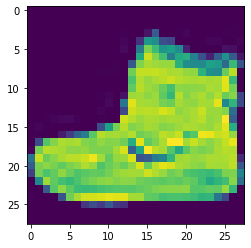

label: Ankle boot


In [20]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

**Fit the model**

In [22]:
# Fit the model 

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 32s 4ms/step - loss: 0.5792 - sparse_categorical_accuracy: 0.7988 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 1s 4ms/step - loss: 0.3770 - sparse_categorical_accuracy: 0.8679 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 1s 4ms/step - loss: 0.3380 - sparse_categorical_accuracy: 0.8806 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 1s 4ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.8865 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 1s 4ms/step - loss: 0.3047 - sparse_categorical_accuracy: 0.8921 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 1s 4ms/step - loss: 0.2936 - sparse_categorical_accuracy: 0.8953 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 1s 4ms/step - loss: 0.2852 - sparse_categorical_accuracy: 

**Plot training history**

In [23]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.579199,0.798817,4.420000
1,0.377031,0.867883,4.420001
2,0.337952,0.880550,4.420000
3,0.318512,0.886500,4.420000
4,0.304749,0.892067,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

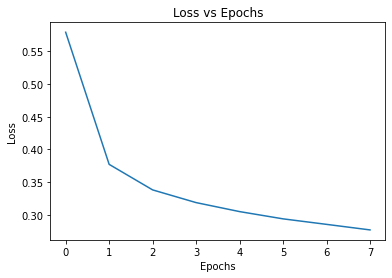

In [24]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title = 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

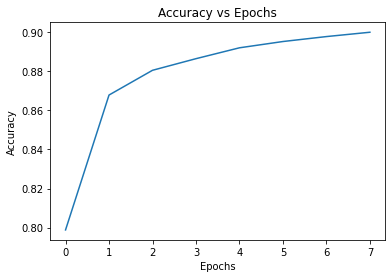

In [25]:
# Make a plot for the accuracy

accuracy_plot = df.plot(y='sparse_categorical_accuracy', title = 'Accuracy vs Epochs', legend = False)
accuracy_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0, 0.5, 'Mean Absolute Error'), Text(0.5, 0, 'Epochs')]

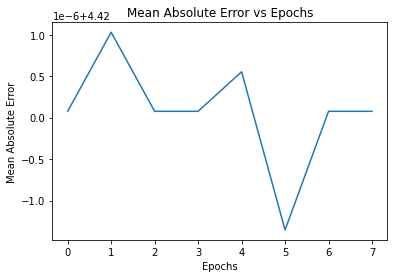

In [26]:
# Make a plot for mean absolute error

accuracy_plot = df.plot(y='mean_absolute_error', title = 'Mean Absolute Error vs Epochs', legend = False)
accuracy_plot.set(xlabel='Epochs', ylabel='Mean Absolute Error')

## **The evaluate and predict methods**

In [27]:
import matplotlib.pyplot as plt
import numpy as np

**Evaluate the model on the test set**

In [28]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3057 - sparse_categorical_accuracy: 0.8928 - mean_absolute_error: 4.4200


**Make predictions from the model**

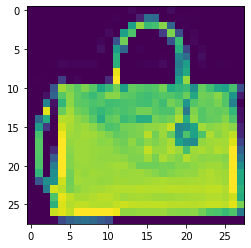

Label: Bag


In [29]:
# Choose a random test image

#random_inx = np.random.choice(test_images.shape[0])
inx=30
#test_image = test_images[random_inx]
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")
#print(f"Label: {labels[test_labels[random_inx]]}")

In [30]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction:{labels[np.argmax(predictions)]}")

Model prediction:Bag
